In [1]:
#B1 tai source tu git
import os
if not os.path.exists('/kaggle/working/deepfake_detection'):
    !git clone --branch dev https://github.com/phungbminh/deepfake_detection.git
else:
    !git pull origin dev
os.chdir("/kaggle/working/deepfake_detection/")

Cloning into 'deepfake_detection'...
remote: Enumerating objects: 12070, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 12070 (delta 25), reused 35 (delta 12), pack-reused 12022 (from 1)
Receiving objects: 100% (12070/12070), 1.31 GiB | 43.91 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [2]:
#B2 chai tap dataset thanh train/val
import dataset as ds
import train as t
image_path = '/kaggle/input/deep-fake/images/'
train_path, val_path = ds.clone_data(image_path)

Splitting dataset...
 > fake_face2face:
done
 > real:
done
 > fake_deepfake:
done


In [3]:
#B3 train
epochs = 10
modelInfo = 'ResNet50'
if os.path.exists(train_path) or os.path.exists(train_path):
    perf_train_acc, perf_val_acc, perf_loss = t.run(modelInfo, train_path, val_path, 0 , epochs)
else:
    throw_error("No data train")

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s] 


=====Epoch 1
Training...
Epoch [1], Batch [160/160] - Processing: 100.00%..
Evaluating...
{'training_loss': 0.7736190140247345, 'train_acc': 66.6667, 'val_acc': 66.6667}
=====Epoch 2
Training...
Epoch [2], Batch [160/160] - Processing: 100.00%..
Evaluating...
{'training_loss': 0.6448085483163595, 'train_acc': 66.6667, 'val_acc': 66.6667}
=====Epoch 3
Training...
Epoch [3], Batch [160/160] - Processing: 100.00%..
Evaluating...
{'training_loss': 0.6402985420078039, 'train_acc': 64.8438, 'val_acc': 64.2917}
=====Epoch 4
Training...
Epoch [4], Batch [160/160] - Processing: 100.00%..
Evaluating...
{'training_loss': 0.61077113840729, 'train_acc': 68.7917, 'val_acc': 67.7083}
=====Epoch 5
Training...
Epoch [5], Batch [160/160] - Processing: 100.00%..
Evaluating...
{'training_loss': 0.5457094574347139, 'train_acc': 73.0833, 'val_acc': 71.2917}
=====Epoch 6
Training...
Epoch [6], Batch [160/160] - Processing: 100.00%..
Evaluating...
{'training_loss': 0.44812839599326254, 'train_acc': 72.9167, '

In [4]:
perf_train_acc, perf_val_acc, perf_loss

([66.6667,
  66.6667,
  64.8438,
  68.7917,
  73.0833,
  72.9167,
  86.6562,
  81.2812,
  80.6875,
  86.5208],
 [66.6667,
  66.6667,
  64.2917,
  67.7083,
  71.2917,
  75.4167,
  85.125,
  84.875,
  85.8333,
  87.8333],
 [0.7736190140247345,
  0.6448085483163595,
  0.6402985420078039,
  0.61077113840729,
  0.5457094574347139,
  0.44812839599326254,
  0.39001270616427064,
  0.3059320140630007,
  0.26510792374610903,
  0.21735267834737898])

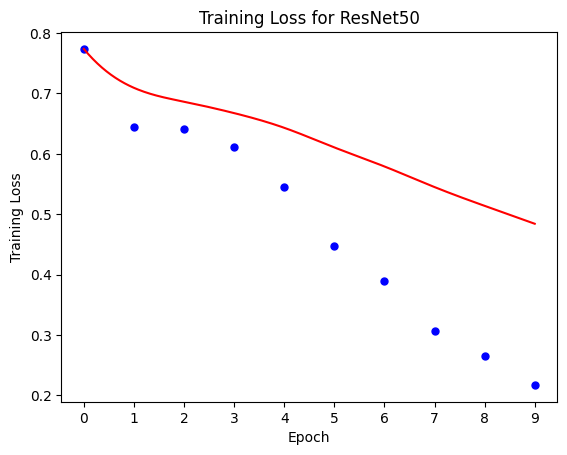

In [5]:
#B4 visualize loss qua cac epoch
import plot_utils as pltu

pltu.plot_training_loss(perf_loss, epochs, modelInfo)

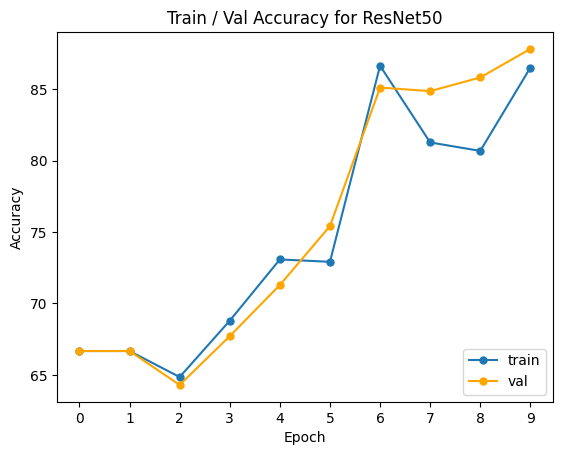

In [8]:
modelInfo = 'ResNet50'
#B5 visualize accuracy qua cac epoch
pltu.plot_accuracy(perf_train_acc, perf_val_acc, epochs, modelInfo)

/tmp/ipykernel_36/304824499.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  network.load_state_dict(torch.load('./model_res/ResNet50/BestTrain.pt', map_location=device))

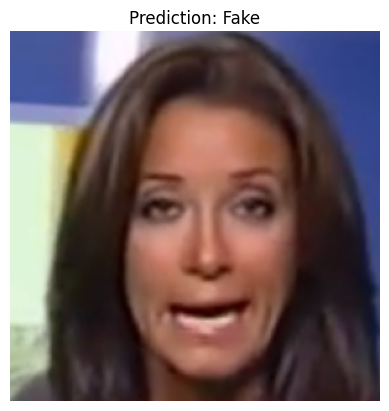

In [58]:
import utils as utl
image_path = '/kaggle/input/deep-fake/images/real/1011.png' 
utl.predict_image(image_path, 'ResNet50')